<h1 align = "center"><b>FINAL PROJECT</b></h1><br>
<h1 align = "center"><b>Brazilian E-Commerce Public Dataset by Olist</b></h1><br>

<h1 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">FOR BETTER EXPERIENCE</h1>

***Please run cell code below***

In [1]:
import pandas as pd

# larger cell code
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# show all columns on pandas dataframe
pd.set_option("display.max_columns", None)

# show all value in columns, wider columns
pd.set_option("max_colwidth", 0)

***Notes***
* Hyperlink that I made might not work well with several nbextension like `table of content`
* Others might also causing the issue, but I think uncheck only `table of content` will resolve the issue.

<h1 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">TABLE OF CONTENT</h1>

<a id="toc"></a>

[1. BUSINESS PROBLEM UNDERSTANDING](#1)<br><br>
[2. LIBRARY](#2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.1. PYTHON LIBRARY](#2.1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.2. DEFINED FUNCTION](#2.2)<br><br>
[3. DATA UNDERSTANDING](#3)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.1. IMPORT DATA](#3.1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.2. EXPLORATORY_DATA_ANALYSIS](#3.2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.3. EXPLANATORY_DATA_ANALYSIS](#3.3)<br>


<a id="1"></a>
<font color="lightseagreen" size=+3><b>1. BUSINESS PROBLEM UNDERSTANDING</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

**CONTEXT**<br>
>**CHURN & TELCO**<br>
>
>**DAMPAK *CHURN***<br>
>
>***SPECIAL NOTES***<br>

**PROBLEM STATEMENT**<br>

**VARIABLES**<br>
* *Available features are as follows*<br>

* *Target*<br>

**OBJECTIVES**<br>

**ACTION**<br>

**VALUE**<br>

<a id="1.confussionmatrix"></a>
***CONFUSSION MATRIX***

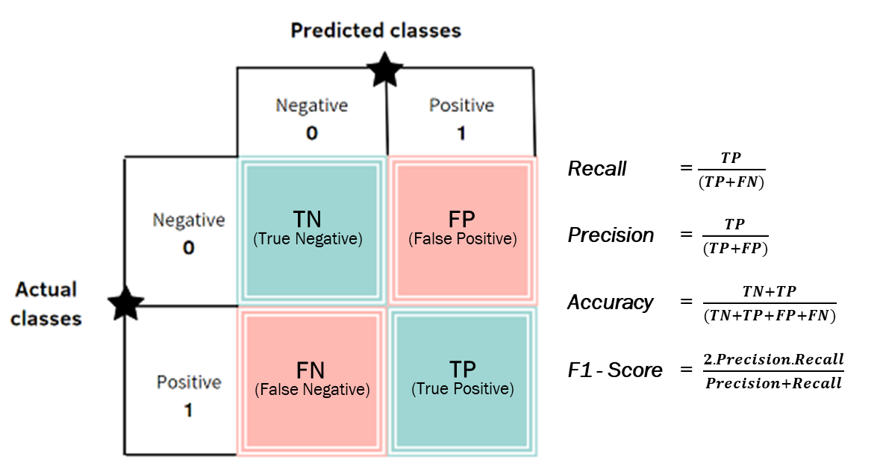

>***TEMPLATE***<br><br>
>**TARGET**<br>
>
><br>***CONFUSSION MATRIX STATEMENT***<br>
>
><br>***CONSEQUENCE***<br>
>
><br>***METRICS***<br>
>

<a id="2"></a>
<font color="lightseagreen" size=+3><b>2. LIBRARY</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

<a id="2.1"></a>
<font color="lightseagreen" size=+2><b>2.1. PYTHON PACKAGE LIBRARY</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

In [2]:
import pandas as pd

# larger cell code
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# show all columns on pandas dataframe
pd.set_option("display.max_columns", None)

# show all value in columns, wider columns
pd.set_option("max_colwidth", 0)

In [3]:
# common dataframe
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_html
from IPython.display import IFrame
from itertools import chain,cycle

# math & statistic function
import scipy.stats as stats
from scipy.stats import skew
from scipy.stats import kstest
from scipy.stats import shapiro

<a id="2.2"></a>
<font color="lightseagreen" size=+2><b>2.2. DEFINED FUNCTION</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

In [4]:
# silahkan fungsi ini di trial. sepertinya masih butuh beberapa penyesuaian
def general_eda(df):
    gen_info = []
    for i in df.columns:
        try : 
            samples = df[i].drop_duplicates(keep = "first").sample(2).values
        except ValueError : 
            samples = df[i].sample().values
            
        gen_info.append([
            i,
            df[i].dtype,
            df[i].isna().sum(),
            round(((df[i].isna().sum()*100) / df.shape[0]),2), # cek bagian ini untuk lebih tepatnya.
            df[i].nunique(),
            samples])

    gen_info_df = pd.DataFrame(
                    data = gen_info,
                    columns = ["features", "type", "n_null", "nullpct", "n_unique", "sampledata"])
    return(gen_info_df)

In [5]:
# check each feature categorical or numerical
def col_info(df, i, figsize = (5, 3)):
    print(f"index kolom : {i}")
    print(f"nama kolom : {df.columns[i]}")
    print("\nUnique item pada kolom")
    print(f"{df[df.columns[i]].unique()}")
    print("\nValue Counts")
    df_col_info = pd.DataFrame(df[df.columns[i]].value_counts())
    df_col_info.rename(columns = {f"{df.columns[i]}" : f"n_{df.columns[i]}"}, inplace = True)
    
    plt.figure(figsize = figsize)
    sns.countplot(data = df, x = df[df.columns[i]], palette = "Set2")
    plt.xticks(rotation = 45)
    plt.show()
    
    return df_col_info

In [6]:
# check feature if too much numerical. 
# then check for distribution and outliers 
def visualize_distribution(df, i) :
    print(f"Stats for {df.columns[i]}:")
    display(df[df.columns[i]].describe())
    fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (12,8), 
                                   gridspec_kw={"height_ratios": (.15, .85),
                                               "hspace": 0.05})
    ax1.set_title(f"Distribution of {[df.columns[i]]}", color = "gray")
    sns.boxplot(df[df.columns[i]], ax = ax1)
    ax1.set(xlabel = "")
    sns.distplot(df[df.columns[i]], ax = ax2)
    plt.show()

    print(f"Skewness of {df.columns[i]}:", skew(df[df.columns[i]]))

In [7]:
# categorical features and target in proprortion
def target_n_dependant_categorical(df, feature_list , target, n_col = 4, n_rows = 2, figsize = (22,8)):
    print(f"ada {len(feature_list)} categorical features :", feature_list)
    print("target variables :", target, "\n")
    fig, axes = plt.subplots(n_rows, n_col)
    fig.set_size_inches(figsize)
    for ax, v in zip(axes.flatten(), feature_list):
        pd.crosstab(df[v], df[target]).plot(kind = "bar", ax = ax)
        xlabel = pd.crosstab(df[v], df[target], normalize = True).index
        ax.set_ylim(0, 2500)
        ax.set_title(f"n_Cust - {target} by {v}", size = 14)
        ax.set_ylabel("n_Customer")
        ax.set_xticklabels(xlabel, rotation = 0)
        ax.grid()
    plt.tight_layout()
    plt.show()

In [8]:
# categorical features and target in proprortion
def target_n_dependant_categorical_proportion(df, feature_list , target, n_col = 4, n_rows = 2, figsize = (22,8)):
    print(f"ada {len(feature_list)} categorical features :", feature_list)
    print("target variables :", target, "\n")
    fig, axes = plt.subplots(n_rows, n_col)
    fig.set_size_inches(figsize)
    for ax, v in zip(axes.flatten(), feature_list):
        pd.crosstab(df[v], df[target], normalize = True).plot(kind = "bar", stacked = True, ax = ax)
        xlabel = pd.crosstab(df[v], df[target], normalize = True).index
        ax.set_ylim(0, 0.8)
        ax.set_title(f"Cust.Prop - {target} by {v}", size = 14)
        ax.set_ylabel("n_customer")
        ax.set_xticklabels(xlabel, rotation = 0)
        ax.grid()
    plt.tight_layout()
    plt.show()

In [9]:
# displaying column side by side
def display_side_by_side(*args,titles=cycle([""])):
    html_str = ""
    for df,title in zip(args, chain(titles,cycle(["</br>"])) ):
        html_str += "<th style='text-align:center'><td style = 'vertical-align:top'>"
        html_str += f"<h3>{title}</h3>"
        html_str += df.to_html().replace("table","table style='display:inline'")
        html_str += "</td></th>"
    display_html(html_str,raw=True)

In [10]:
# Visualize Outliers
def outlier(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    below = q1 - 1.5 * iqr
    above = q3 + 1.5 * iqr
    idx_outlier = df[(df[col] > above) | (df[col] < below)].index
    return idx_outlier

def outliers_tabulation(df, col_list):
    df_outlier= pd.DataFrame(columns=["features", "n_outliers", "outliers_pct(%)"])

    for i in col_list:
        df_outlier= df_outlier.append({"features": i, "n_outliers": len(outlier(df, i)),"outliers_pct(%)": f"{round(len(outlier(df, i))/len(df)*100,2)} %"}, ignore_index = True)

    return df_outlier

In [11]:
# label for model result compilation
def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.4f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment

In [12]:
# Classification report on dataframe
def get_classification_report(y_test, y_pred):
    '''Source: https://stackoverflow.com/questions/39662398/scikit-learn-output-metrics-classification-report-into-csv-tab-delimited-format'''
    from sklearn import metrics
    report = metrics.classification_report(y_test, y_pred, output_dict=True)
    
    # DataFrame Creation
    df_classification_report = pd.DataFrame(report).T
    
    # Adjusting Support 3rd value to mimic actual classification report, it is a support, ain't metrics
    # if the macro avg and weighted avg not the same. back to accuracy
    if df_classification_report["support"]["macro avg"] == df_classification_report["support"]["weighted avg"] :
        adjustment_val = df_classification_report["support"]["macro avg"]
    else :
        adjustment_val = df_classification_report["f1-score"]["accuracy"]
        
    df_classification_report["support"]["accuracy"] = adjustment_val
        
    # adjusting support is int, not float
    df_classification_report["support"] = df_classification_report["support"].apply(int)
    
    # creating space between metrics & supports
    df_classification_report.insert(3, "  ", ["  ", "  ", "  ", "  ", "  ",])
    
    # remove accuracy from precision and recall column
    df_classification_report["precision"]["accuracy"] = " "
    df_classification_report["recall"]["accuracy"] = " "    
    
    # menambahkan spacing antara kelas dengan acc, macro avg, weighted avg
    # membuat variabel baru untuk memisahkan data baris ke 1 dan 2 dengan sisanya
    data1 = df_classification_report[:2]
    data2 = df_classification_report[2:]
    
    # membuat spacing untuk dummy. diinset pada data 1
    spacing = pd.DataFrame({
    "precision" : [" "],
    "recall" : [" "],
    "f1-score" : [" "],
    "  " : [" "],
    "support" : [" "]})
    
    # menggabungkan data1 dengan spasi yang sudah diinptu dengan data2.
    # mengembalikan ke bentuk df_classfication report, tapi dengan tambahan spasi
    data1 = pd.concat([data1, spacing], axis = 0)
    df_classification_report_finale = pd.concat([data1, data2], axis = 0)
    
    # penyesuaian nama index
    df_classification_report_finale.index = ["0", "1", "", "accuracy", "macro avg", "weighted avg"]
    
    return df_classification_report_finale

<a id="3"></a>
<font color="lightseagreen" size=+3><b>3. DATA UNDERSTANDING</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

Diberikan schema dari data Brazilian E - Commerce Public Dataset By Olist sebagai berikut

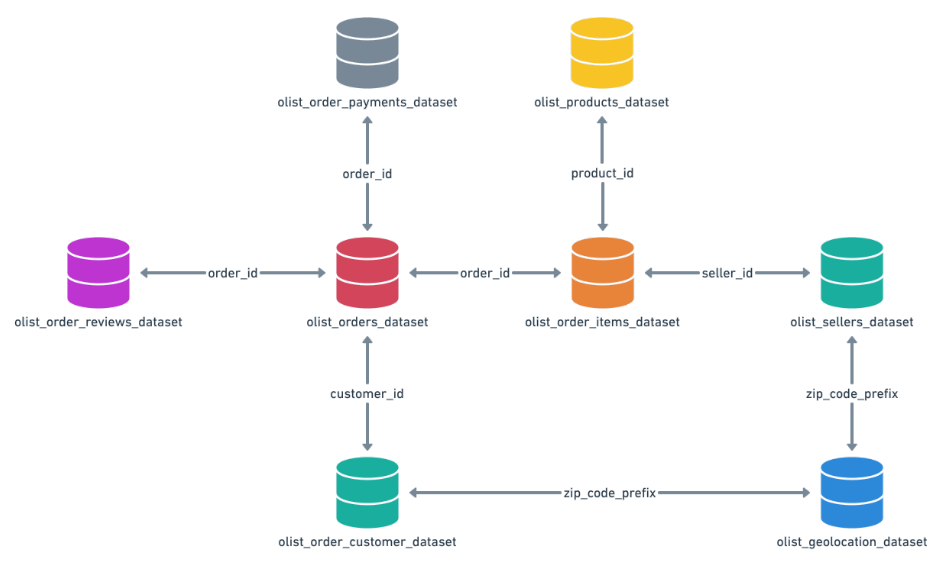

<a id="3.1"></a>
<font color="lightseagreen" size=+2><b>3.1. IMPORT DATA</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

Upload seluruh data ke Jupyter Notebook untuk dipelajari

In [13]:
# read_csv ke - 1 yaitu orders dataset
df_orders = pd.read_csv("olist_orders_dataset.csv")
df_orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [14]:
# read_csv ke - 2 yaitu order_items dataset
df_order_items = pd.read_csv("olist_order_items_dataset.csv")
df_order_items.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [15]:
# read_csv ke - 3 yaitu data customer dataset
df_customers = pd.read_csv("olist_customers_dataset.csv")
df_customers.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [16]:
# read_csv ke - 4 yaitu reviews dataset
df_reviews = pd.read_csv("olist_order_reviews_dataset.csv")
df_reviews.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa,2018-03-01 00:00:00,2018-03-02 10:26:53


In [17]:
# read_csv ke - 5 yaitu payment information dataset
df_payments = pd.read_csv("olist_order_payments_dataset.csv")
df_payments.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [18]:
# read_csv ke - 6 yaitu products dataset
df_products = pd.read_csv("olist_products_dataset.csv")
df_products.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [19]:
# read_csv ke - 7 yaitu seller dataset
df_sellers = pd.read_csv("olist_sellers_dataset.csv")
df_sellers.head(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [20]:
# read_csv ke - 8 yaitu geolocation dataset
df_geoloc = pd.read_csv("olist_geolocation_dataset.csv")
df_geoloc.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


<a id="3.2"></a>
<font color="lightseagreen" size=+2><b>3.2. EXPLORATORY DATA ANALYSIS</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

***CEK DIMENSI DATA***<br><br>
Mengetahui dimensi data dari tiap tabel data

In [21]:
print("Tabel data orders         = ", df_orders.shape)
print("Tabel data order item     = ", df_order_items.shape)
print("Tabel data customers      = ", df_customers.shape)
print("Tabel data reviews        = ", df_reviews.shape)
print("Tabel data payment        = ", df_payments.shape)
print("Tabel data products       = ", df_products.shape)
print("Tabel data sellers        = ", df_sellers.shape)
print("Tabel data geolocation    = ", df_geoloc.shape)
all_df = [df_orders, df_order_items, df_customers, df_reviews, df_payments, df_products, df_sellers, df_geoloc]
all_df_idtf = ["table_order", "table_order_items", "table_customers", "table_reviews", "table_payment", "table_products", "table_sellers", "table_geoloc"]

Tabel data orders         =  (99441, 8)
Tabel data order item     =  (112650, 7)
Tabel data customers      =  (99441, 5)
Tabel data reviews        =  (99224, 7)
Tabel data payment        =  (103886, 5)
Tabel data products       =  (32951, 9)
Tabel data sellers        =  (3095, 4)
Tabel data geolocation    =  (1000163, 5)


***PEMERIKSAAN DATA DUPLIKAT***<br><br>

Sebelum kita menggabungkan data dari tabel tersebut, alangkah baiknya dicek terlebih dahulu apakah ada data duplikat atau tidak. Pemeriksaan akan dilakukan dibawah ini

In [22]:
for i in range(len(all_df)):
    dummy_df_0 = all_df[i]
    dups = dummy_df_0.duplicated()
    print(f"{all_df_idtf[i]} has", dummy_df_0[dups].shape[0], "rows of duplicate data")

table_order has 0 rows of duplicate data
table_order_items has 0 rows of duplicate data
table_customers has 0 rows of duplicate data
table_reviews has 0 rows of duplicate data
table_payment has 0 rows of duplicate data
table_products has 0 rows of duplicate data
table_sellers has 0 rows of duplicate data
table_geoloc has 261831 rows of duplicate data


Dari output diatas, kita ketahui bahwa pada table_geoloc terdapat 261831 data duplikat. Data duplikat tersebut akan kita hapus sebelum diproses lebih lanjut. kita akan copy terlebih dahulu df_geoloc agar kita bisa mengecek bahwa data telah kita proses

<a id="3.3"></a>
<font color="lightseagreen" size=+2><b>3.3. DATA FOR TABLEAU</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

---

***PART 1***

In [23]:
df_payments["payment_type"].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

We understand there are several payment type

In [24]:
pd.DataFrame(df_payments["order_id"].value_counts()).head(15)

,order_id
fa65dad1b0e818e3ccc5cb0e39231352,29
ccf804e764ed5650cd8759557269dc13,26
285c2e15bebd4ac83635ccc563dc71f4,22
895ab968e7bb0d5659d16cd74cd1650c,21
fedcd9f7ccdc8cba3a18defedd1a5547,19
ee9ca989fc93ba09a6eddc250ce01742,19
4bfcba9e084f46c8e3cb49b0fa6e6159,15
21577126c19bf11a0b91592e5844ba78,15
3c58bffb70dcf45f12bdf66a3c215905,14
4689b1816de42507a7d63a4617383c59,14


We understand that in 1 order_id can contain 29 transaction to fully paid 1 order_id, let's check em further. We're gonna use several order_id to check and make sure several things

* c6492b842ac190db807c15aff21a7dd6
* fa65dad1b0e818e3ccc5cb0e39231352

In [25]:
df_payments[df_payments["order_id"] == "c6492b842ac190db807c15aff21a7dd6"]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
1632,c6492b842ac190db807c15aff21a7dd6,1,credit_card,3,81.77
12517,c6492b842ac190db807c15aff21a7dd6,12,voucher,1,38.37
19338,c6492b842ac190db807c15aff21a7dd6,3,voucher,1,30.59
30158,c6492b842ac190db807c15aff21a7dd6,4,voucher,1,23.15
32926,c6492b842ac190db807c15aff21a7dd6,10,voucher,1,73.76
38439,c6492b842ac190db807c15aff21a7dd6,11,voucher,1,34.73
44136,c6492b842ac190db807c15aff21a7dd6,7,voucher,1,36.38
50671,c6492b842ac190db807c15aff21a7dd6,6,voucher,1,11.57
59139,c6492b842ac190db807c15aff21a7dd6,9,voucher,1,36.88
80685,c6492b842ac190db807c15aff21a7dd6,2,voucher,1,19.84


***REMARKS***
* Now we understand that in 1 order id, the payment can be split multiple time and with different type of payment type. 

In [26]:
sample_p1 = df_payments[df_payments["order_id"] == "c6492b842ac190db807c15aff21a7dd6"]["payment_value"].sum()
sample_p2 = df_payments[df_payments["order_id"] == "fa65dad1b0e818e3ccc5cb0e39231352"]["payment_value"].sum()

print("total payment for c6492b842ac190db807c15aff21a7dd6 = ",sample_p1)
print("total payment for fa65dad1b0e818e3ccc5cb0e39231352 = ",sample_p2)

total payment for c6492b842ac190db807c15aff21a7dd6 =  425.4
total payment for fa65dad1b0e818e3ccc5cb0e39231352 =  457.99


In [27]:
prod_price1 = df_order_items[df_order_items["order_id"] == "c6492b842ac190db807c15aff21a7dd6"]["price"].sum()
ship_price1 = df_order_items[df_order_items["order_id"] == "c6492b842ac190db807c15aff21a7dd6"]["freight_value"].sum()

prod_price2 = df_order_items[df_order_items["order_id"] == "fa65dad1b0e818e3ccc5cb0e39231352"]["price"].sum()
ship_price2 = df_order_items[df_order_items["order_id"] == "fa65dad1b0e818e3ccc5cb0e39231352"]["freight_value"].sum()

print("product + shipping price for c6492b842ac190db807c15aff21a7dd6 = ", round((prod_price1 + ship_price1),2))
print("product + shipping price for fa65dad1b0e818e3ccc5cb0e39231352 = ", round((prod_price2 + ship_price2),2))

df_order_items[(df_order_items["order_id"] == "c6492b842ac190db807c15aff21a7dd6")|(df_order_items["order_id"] == "fa65dad1b0e818e3ccc5cb0e39231352")]

product + shipping price for c6492b842ac190db807c15aff21a7dd6 =  425.4
product + shipping price for fa65dad1b0e818e3ccc5cb0e39231352 =  457.99


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
87331,c6492b842ac190db807c15aff21a7dd6,1,0449db5eede617c5fd413071d582f038,21e83881401b92b49fb09a16d3852291,2017-03-15 23:39:26,189.90,22.80
87332,c6492b842ac190db807c15aff21a7dd6,2,0449db5eede617c5fd413071d582f038,21e83881401b92b49fb09a16d3852291,2017-03-15 23:39:26,189.90,22.80
110202,fa65dad1b0e818e3ccc5cb0e39231352,1,1aecdb5fa3add74e385f25c6c527a462,06532f10282704ef4c69168b914b77be,2017-04-27 09:10:13,392.55,65.44


***REMARKS***
* Now we understand that customer is paying for product & delivery (freight value is price customer have to pay for delivery services). 
* let's change the name so we can understand it better

In [28]:
print("creditcard_installments\n",df_payments[df_payments["payment_type"] == "credit_card"]["payment_installments"].value_counts(), "\n")
print("boleto_installments\n",df_payments[df_payments["payment_type"] == "boleto"]["payment_installments"].value_counts(), "\n")
print("voucher_installments\n",df_payments[df_payments["payment_type"] == "voucher"]["payment_installments"].value_counts(), "\n")
print("debit_installments\n",df_payments[df_payments["payment_type"] == "debit_card"]["payment_installments"].value_counts(), "\n")
print("not_defined_installments\n",df_payments[df_payments["payment_type"] == "not_defined"]["payment_installments"].value_counts(), "\n")

creditcard_installments
 1     25455
2     12413
3     10461
4     7098 
10    5328 
5     5239 
8     4268 
6     3920 
7     1626 
9     644  
12    133  
15    74   
18    27   
11    23   
24    18   
20    17   
13    16   
14    15   
17    8    
16    5    
21    3    
0     2    
22    1    
23    1    
Name: payment_installments, dtype: int64 

boleto_installments
 1    19784
Name: payment_installments, dtype: int64 

voucher_installments
 1    5775
Name: payment_installments, dtype: int64 

debit_installments
 1    1529
Name: payment_installments, dtype: int64 

not_defined_installments
 1    3
Name: payment_installments, dtype: int64 



Because payment_sequential is kinda make things complicated, We drop it

In [29]:
df_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [30]:
df_payments = pd.pivot_table(data = df_payments, 
                               index = ["order_id", "payment_type"], 
                               aggfunc = {"payment_type" : "count", "payment_value" : "sum"})

df_payments.rename(columns = {"payment_type" : "payment_splits", "payment_value" : "payment_per_payment_type"}, inplace = True)
df_payments.reset_index(inplace = True)
df_payments

,order_id,payment_type,payment_splits,payment_per_payment_type
0,00010242fe8c5a6d1ba2dd792cb16214,credit_card,1,72.19
1,00018f77f2f0320c557190d7a144bdd3,credit_card,1,259.83
2,000229ec398224ef6ca0657da4fc703e,credit_card,1,216.87
3,00024acbcdf0a6daa1e931b038114c75,credit_card,1,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,credit_card,1,218.04
...,...,...,...,...
101681,fffc94f6ce00a00581880bf54a75a037,boleto,1,343.40
101682,fffcd46ef2263f404302a634eb57f7eb,boleto,1,386.53
101683,fffce4705a9662cd70adb13d4a31832d,credit_card,1,116.85
101684,fffe18544ffabc95dfada21779c9644f,credit_card,1,64.71


---

***PART 2***

In [31]:
df_order_items.rename(columns = {"price" : "product_price", "freight_value" : "ship_cost"}, inplace = True)
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,product_price,ship_cost
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [32]:
pd.DataFrame(df_order_items.order_id.value_counts()).head(15)

,order_id
8272b63d03f5f79c56e9e4120aec44ef,21
1b15974a0141d54e36626dca3fdc731a,20
ab14fdcfbe524636d65ee38360e22ce8,20
9ef13efd6949e4573a18964dd1bbe7f5,15
428a2f660dc84138d969ccd69a0ab6d5,15
9bdc4d4c71aa1de4606060929dee888c,14
73c8ab38f07dc94389065f7eba4f297a,14
37ee401157a3a0b28c9c6d0ed8c3b24b,13
2c2a19b5703863c908512d135aa6accc,12
c05d6a79e55da72ca780ce90364abed9,12


In [33]:
df_order_items[df_order_items["order_id"] == "8272b63d03f5f79c56e9e4120aec44ef"]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,product_price,ship_cost
57297,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57298,8272b63d03f5f79c56e9e4120aec44ef,2,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57299,8272b63d03f5f79c56e9e4120aec44ef,3,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57301,8272b63d03f5f79c56e9e4120aec44ef,5,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57302,8272b63d03f5f79c56e9e4120aec44ef,6,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57303,8272b63d03f5f79c56e9e4120aec44ef,7,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57305,8272b63d03f5f79c56e9e4120aec44ef,9,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57306,8272b63d03f5f79c56e9e4120aec44ef,10,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89


In [34]:
sample_pp3 = df_order_items[df_order_items["order_id"] == "8272b63d03f5f79c56e9e4120aec44ef"]["product_price"].sum()
sample_sc3 = df_order_items[df_order_items["order_id"] == "8272b63d03f5f79c56e9e4120aec44ef"]["ship_cost"].sum()

print("harga produk = ", round(sample_pp3, 2))
print("biaya delivery = ", round(sample_sc3, 2))
print("total transfer = ", round((sample_pp3 + sample_sc3),2))

harga produk =  31.8
biaya delivery =  164.37
total transfer =  196.17


In [35]:
df_payments[df_payments["order_id"] == "8272b63d03f5f79c56e9e4120aec44ef"]

,order_id,payment_type,payment_splits,payment_per_payment_type
51713,8272b63d03f5f79c56e9e4120aec44ef,credit_card,1,196.11


***REMARKS***
* Just making sure that for order_id 8272b63d03f5f79c56e9e4120aec44ef, payment_value is equal to productprice & shipping cost

After understanding the data above, we're gonna make some change. 
* Removing order_item_id
* Add new column n_items_purchased

In [36]:
# Removing order_item_id
df_order_items.drop("order_item_id", axis = 1, inplace = True)

In [37]:
# Add mew column n_items

# Start by calculate duplicate data using agg_func = "size". 
# We can find duplicate data now since we already drop "order_item_id" that makes that rows kinda unique.
df_order_items = df_order_items.pivot_table(columns = list(df_order_items.columns), aggfunc = "size").reset_index()

df_order_items.head()

,order_id,product_id,seller_id,shipping_limit_date,product_price,ship_cost,0
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1


In [38]:
# There'll be new column named "0", that column is generated using pivot. That new column indicate how much duplicate values (indicating n_items_purchased)
# Let's rename that column so we can understand it better when we see it
df_order_items.rename(columns = {0 : "n_items_purchased"}, inplace = True)
df_order_items.head()

,order_id,product_id,seller_id,shipping_limit_date,product_price,ship_cost,n_items_purchased
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1


In [39]:
# After doing that let's check if the product + shipped cost is equal to customer transfer
# We're gonna use same order_id 8272b63d03f5f79c56e9e4120aec44ef

# We're gonna see the cost first
df_order_items[df_order_items["order_id"] == "8272b63d03f5f79c56e9e4120aec44ef"]

,order_id,product_id,seller_id,shipping_limit_date,product_price,ship_cost,n_items_purchased
52027,8272b63d03f5f79c56e9e4120aec44ef,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,10
52028,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,10
52029,8272b63d03f5f79c56e9e4120aec44ef,79ce45dbc2ea29b22b5a261bbb7b7ee7,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,7.8,6.57,1


In [40]:
df_payments[df_payments["order_id"] == "8272b63d03f5f79c56e9e4120aec44ef"]

,order_id,payment_type,payment_splits,payment_per_payment_type
51713,8272b63d03f5f79c56e9e4120aec44ef,credit_card,1,196.11


df_order_items need to be modified further by balancing cost & n_items_purchased with payment_value. Basically calculate : 
* product_price * n_items_purchased
* ship_cost * n_items_purchased

After doing that, we can see that the cost (product + ship) will be equal to payment_value

In [41]:
# Lil math
df_order_items["product_price_m"] = df_order_items["product_price"] * df_order_items["n_items_purchased"]
df_order_items["ship_cost_m"] = df_order_items["ship_cost"] * df_order_items["n_items_purchased"]
df_order_items["product_price_&_ship_cost"] = df_order_items["product_price_m"] + df_order_items["ship_cost_m"]

# Drop the unnecessary column
df_order_items.drop(columns = ["product_price", "ship_cost"], inplace = True)

# Check the output
df_order_items.head()

,order_id,product_id,seller_id,shipping_limit_date,n_items_purchased,product_price_m,ship_cost_m,product_price_&_ship_cost
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,1,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,1,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,1,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,1,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,1,199.90,18.14,218.04


In this section, we make sure that the cost equal to the payment_value

In [42]:
# The Cost 1
df_order_items[df_order_items["order_id"] == "8272b63d03f5f79c56e9e4120aec44ef"]

,order_id,product_id,seller_id,shipping_limit_date,n_items_purchased,product_price_m,ship_cost_m,product_price_&_ship_cost
52027,8272b63d03f5f79c56e9e4120aec44ef,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,10,12.0,78.90,90.90
52028,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,10,12.0,78.90,90.90
52029,8272b63d03f5f79c56e9e4120aec44ef,79ce45dbc2ea29b22b5a261bbb7b7ee7,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1,7.8,6.57,14.37


In [43]:
# The Payment 1
df_payments[df_payments["order_id"] == "8272b63d03f5f79c56e9e4120aec44ef"]

,order_id,payment_type,payment_splits,payment_per_payment_type
51713,8272b63d03f5f79c56e9e4120aec44ef,credit_card,1,196.11


In [44]:
# The Cost 2
df_order_items[df_order_items["order_id"] == "2c2a19b5703863c908512d135aa6accc"]

,order_id,product_id,seller_id,shipping_limit_date,n_items_purchased,product_price_m,ship_cost_m,product_price_&_ship_cost
17469,2c2a19b5703863c908512d135aa6accc,03e1c946c0ddfc58724ff262aef08dff,98dac6635aee4995d501a3972e047414,2017-10-18 04:26:49,12,248.4,193.32,441.72


In [45]:
# The Payment 2
df_payments[df_payments["order_id"] == "2c2a19b5703863c908512d135aa6accc"]

,order_id,payment_type,payment_splits,payment_per_payment_type
17387,2c2a19b5703863c908512d135aa6accc,boleto,1,441.72


Because the cost (product & ship cost) is equal to payment_value, we can say that we're correct in how we manipulate our data. We can continue to check others

---

***PART 3***

In [46]:
df_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [47]:
df_products["product_category_name"].value_counts()

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil    5   
casa_conforto_2                  5   
pc_gamer                         3   
seguros_e_servicos               2   
cds_dvds_musicais                1   
Name: product_category_name, Length: 73, dtype: int64

***REMARKS***
* We understand that 1 product_id indicating 1 unqiue product
* 1 category_name can contain n number of products
* We see that product_length, height & width is somewhat not useful because we don't know the product shape is it cubes etc. Hence we're gonna drop that. 
* Others features might still be useful, theoritically : 
    * product name length, description length, photos qty might be indicator for good reviews given by customer
    * product weight can be used to check unit price for shipping


In [48]:
# Drop can't work with features
df_products.drop(columns = ["product_length_cm", "product_height_cm", "product_width_cm"], inplace = True)

# Check the output
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0


---

***PART 4***

In [49]:
len(df_customers.customer_city.unique())

4119

We understand that customer_city might be too much to worked with. hence we can drop the columns

In [50]:
df_customers.drop(columns = ["customer_city"], axis = 1, inplace = True)

# Check the output
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,SP


In [51]:
df_customers.customer_id.value_counts()

06b8999e2fba1a1fbc88172c00ba8bc7    1
c023f30c1147aeb0358474f3b1dbc707    1
b5cbf43f42281920a175fc99650c91d6    1
19f4e983f8f05b7de16670f8a0cf0ac7    1
229ac14c6ee6d6a606264ebcc861beb7    1
                                   ..
31665bd5bc542687ab54c9fd9ed9917b    1
37fb9cce079a4887c96b59bae2011d05    1
1d815f3ad9b2017b6da2c4f1cbb1180b    1
6b05c8f3a25a71005d5eb9b51766c333    1
274fa6071e5e17fe303b9748641082c8    1
Name: customer_id, Length: 99441, dtype: int64

In [52]:
df_customers.customer_unique_id.value_counts()

8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c    9 
1b6c7548a2a1f9037c1fd3ddfed95f33    7 
ca77025e7201e3b30c44b472ff346268    7 
6469f99c1f9dfae7733b25662e7f1782    7 
                                   .. 
081f07439678af2da7755a0aa572154d    1 
9c57789a6a587f4efcfb01e36c106014    1 
9e4c21635f640562de1a6976374fba03    1 
06c0ea6ee892364d1608ee47aa9f56a0    1 
84732c5050c01db9b23e19ba39899398    1 
Name: customer_unique_id, Length: 96096, dtype: int64

In [53]:
df_customers[df_customers["customer_unique_id"] == "8d50f5eadf50201ccdcedfb9e2ac8455"]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_state
14186,1bd3585471932167ab72a84955ebefea,8d50f5eadf50201ccdcedfb9e2ac8455,4045,SP
15321,a8fabc805e9a10a3c93ae5bff642b86b,8d50f5eadf50201ccdcedfb9e2ac8455,4045,SP
16654,897b7f72042714efaa64ac306ba0cafc,8d50f5eadf50201ccdcedfb9e2ac8455,4045,SP
36122,b2b13de0770e06de50080fea77c459e6,8d50f5eadf50201ccdcedfb9e2ac8455,4045,SP
38073,42dbc1ad9d560637c9c4c1533746f86d,8d50f5eadf50201ccdcedfb9e2ac8455,4045,SP
40141,dfb941d6f7b02f57a44c3b7c3fefb44b,8d50f5eadf50201ccdcedfb9e2ac8455,4045,SP
48614,65f9db9dd07a4e79b625effa4c868fcb,8d50f5eadf50201ccdcedfb9e2ac8455,4045,SP
52574,1c62b48fb34ee043310dcb233caabd2e,8d50f5eadf50201ccdcedfb9e2ac8455,4045,SP
58707,a682769c4bc10fc6ef2101337a6c83c9,8d50f5eadf50201ccdcedfb9e2ac8455,4045,SP
67996,6289b75219d757a56c0cce8d9e427900,8d50f5eadf50201ccdcedfb9e2ac8455,4045,SP


Still don't understand how customer_id and customer_unique_id works. but maybe customer_unique_id is id that alreayd registered in Brazillian Ecommerce

---

***PART 5***

In [54]:
df_sellers.seller_id.value_counts()

3442f8959a84dea7ee197c632cb2df15    1
e26901d5ab434ce92fd9b5c256820a4e    1
7e3f87d16fb353f408d467e74fbd8014    1
9140bd1d9de28b197dce077bdd687438    1
a2b911e9ad40dc7d61c142a4683e2d85    1
                                   ..
f918546be4bec7104d117789ba758b2b    1
eb4a59a06b3948e851a7d7a830bcbc42    1
80146bc52c4f6af5239b23de2a20262b    1
4091f77d8c768fc3e81c20761471761d    1
9e25199f6ef7e7c347120ff175652c3b    1
Name: seller_id, Length: 3095, dtype: int64

---

***PART 6***

In [55]:
df_reviews["review_id"].value_counts()

7b606b0d57b078384f0b58eac1d41d78    3
dbdf1ea31790c8ecfcc6750525661a9b    3
32415bbf6e341d5d517080a796f79b5c    3
0c76e7a547a531e7bf9f0b99cba071c1    3
4219a80ab469e3fc9901437b73da3f75    3
                                   ..
95e01591b0e69a2fab382b0c562d4e20    1
93611e0327d6a1769d1e68cf3caa242d    1
983c47de74278257f99c4b918fd380f1    1
ca475b77fcc618551ef9d516c3f61b88    1
efe49f1d6f951dd88b51e6ccd4cc548f    1
Name: review_id, Length: 98410, dtype: int64

In [56]:
df_reviews[df_reviews["review_id"] == "7b606b0d57b078384f0b58eac1d41d78"]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
7500,7b606b0d57b078384f0b58eac1d41d78,f3028a8f41ea1ee2b461420913663f97,5,NaN,NaN,2017-02-15 00:00:00,2017-02-21 23:30:22
59859,7b606b0d57b078384f0b58eac1d41d78,2deb17060fc1ce18a85eba953ddcdeaf,5,NaN,NaN,2017-02-15 00:00:00,2017-02-21 23:30:22
61069,7b606b0d57b078384f0b58eac1d41d78,2f8f31eb2f7b6572836d662a6625c8e4,5,NaN,NaN,2017-02-15 00:00:00,2017-02-21 23:30:22


In [57]:
df_reviews["order_id"].value_counts()

c88b1d1b157a9999ce368f218a407141    3
8e17072ec97ce29f0e1f111e598b0c85    3
df56136b8031ecd28e200bb18e6ddb2e    3
03c939fd7fd3b38f8485a0f95798f1f6    3
5cb890a68b91b6158d69257e4e2bc359    2
                                   ..
5b4e9a12d219f34f5c2de9f8d620b19d    1
a6da096d974acc000962856d7386448a    1
75e0647c26de647eca3421e9cc66c9da    1
bad0467c52f23cdc71e9fa139d4a8afd    1
90531360ecb1eec2a1fbb265a0db0508    1
Name: order_id, Length: 98673, dtype: int64

In [58]:
df_reviews[df_reviews["order_id"] == "c88b1d1b157a9999ce368f218a407141"]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
1985,ffb8cff872a625632ac983eb1f88843c,c88b1d1b157a9999ce368f218a407141,3,NaN,NaN,2017-07-22 00:00:00,2017-07-26 13:41:07
82525,202b5f44d09cd3cfc0d6bd12f01b044c,c88b1d1b157a9999ce368f218a407141,5,NaN,NaN,2017-07-22 00:00:00,2017-07-26 13:40:22
89360,fb96ea2ef8cce1c888f4d45c8e22b793,c88b1d1b157a9999ce368f218a407141,5,NaN,NaN,2017-07-21 00:00:00,2017-07-26 13:45:15


---

***PART 7***

In [59]:
df_geoloc.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [60]:
df_geoloc["duplicated"] = df_geoloc.duplicated().values

In [61]:
list(df_geoloc[df_geoloc["duplicated"] == True]["geolocation_zip_code_prefix"].unique())

[1046,
 1009,
 1050,
 1032,
 1048,
 1036,
 1013,
 1047,
 1005,
 1026,
 1045,
 1049,
 1035,
 1042,
 1020,
 1033,
 1011,
 1003,
 1019,
 1014,
 1029,
 1016,
 1022,
 1041,
 1031,
 1028,
 1025,
 1017,
 1001,
 1007,
 1040,
 1010,
 1024,
 1027,
 1037,
 1004,
 1030,
 1021,
 1012,
 1034,
 1044,
 1002,
 1018,
 1039,
 1006,
 1043,
 1015,
 1038,
 1008,
 1023,
 1153,
 1130,
 1125,
 1103,
 1141,
 1138,
 1151,
 1155,
 1102,
 1136,
 1139,
 1137,
 1135,
 1156,
 1123,
 1144,
 1134,
 1154,
 1132,
 1120,
 1131,
 1140,
 1129,
 1122,
 1142,
 1104,
 1150,
 1124,
 1107,
 1152,
 1128,
 1109,
 1106,
 1127,
 1121,
 1126,
 1105,
 1133,
 1203,
 1228,
 1216,
 1214,
 1202,
 1226,
 1217,
 1209,
 1233,
 1230,
 1257,
 1242,
 1227,
 1221,
 1211,
 1231,
 1239,
 1241,
 1258,
 1232,
 1212,
 1238,
 1224,
 1208,
 1206,
 1223,
 1243,
 1229,
 1254,
 1244,
 1220,
 1234,
 1218,
 1201,
 1255,
 1222,
 1250,
 1219,
 1240,
 1204,
 1251,
 1249,
 1252,
 1210,
 1259,
 1236,
 1215,
 1213,
 1246,
 1225,
 1205,
 1235,
 1248,
 1245,
 1237,

In [62]:
df_geoloc[(df_geoloc["duplicated"] == True)&(df_geoloc["geolocation_zip_code_prefix"] == 1050)]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,duplicated
79,1050,-23.549854,-46.643139,sao paulo,SP,True
104,1050,-23.549107,-46.644105,são paulo,SP,True
136,1050,-23.549854,-46.643139,sao paulo,SP,True
161,1050,-23.549854,-46.643139,sao paulo,SP,True
190,1050,-23.550737,-46.643371,sao paulo,SP,True
...,...,...,...,...,...,...
1355,1050,-23.549854,-46.643139,são paulo,SP,True
1392,1050,-23.549854,-46.643139,sao paulo,SP,True
1398,1050,-23.548723,-46.643762,sao paulo,SP,True
1416,1050,-23.548573,-46.643505,sao paulo,SP,True


In [63]:
df_geoloc

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,duplicated
0,1037,-23.545621,-46.639292,sao paulo,SP,False
1,1046,-23.546081,-46.644820,sao paulo,SP,False
2,1046,-23.546129,-46.642951,sao paulo,SP,False
3,1041,-23.544392,-46.639499,sao paulo,SP,False
4,1035,-23.541578,-46.641607,sao paulo,SP,False
...,...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS,False
1000159,99900,-27.877125,-52.224882,getulio vargas,RS,True
1000160,99950,-28.071855,-52.014716,tapejara,RS,True
1000161,99980,-28.388932,-51.846871,david canabarro,RS,False


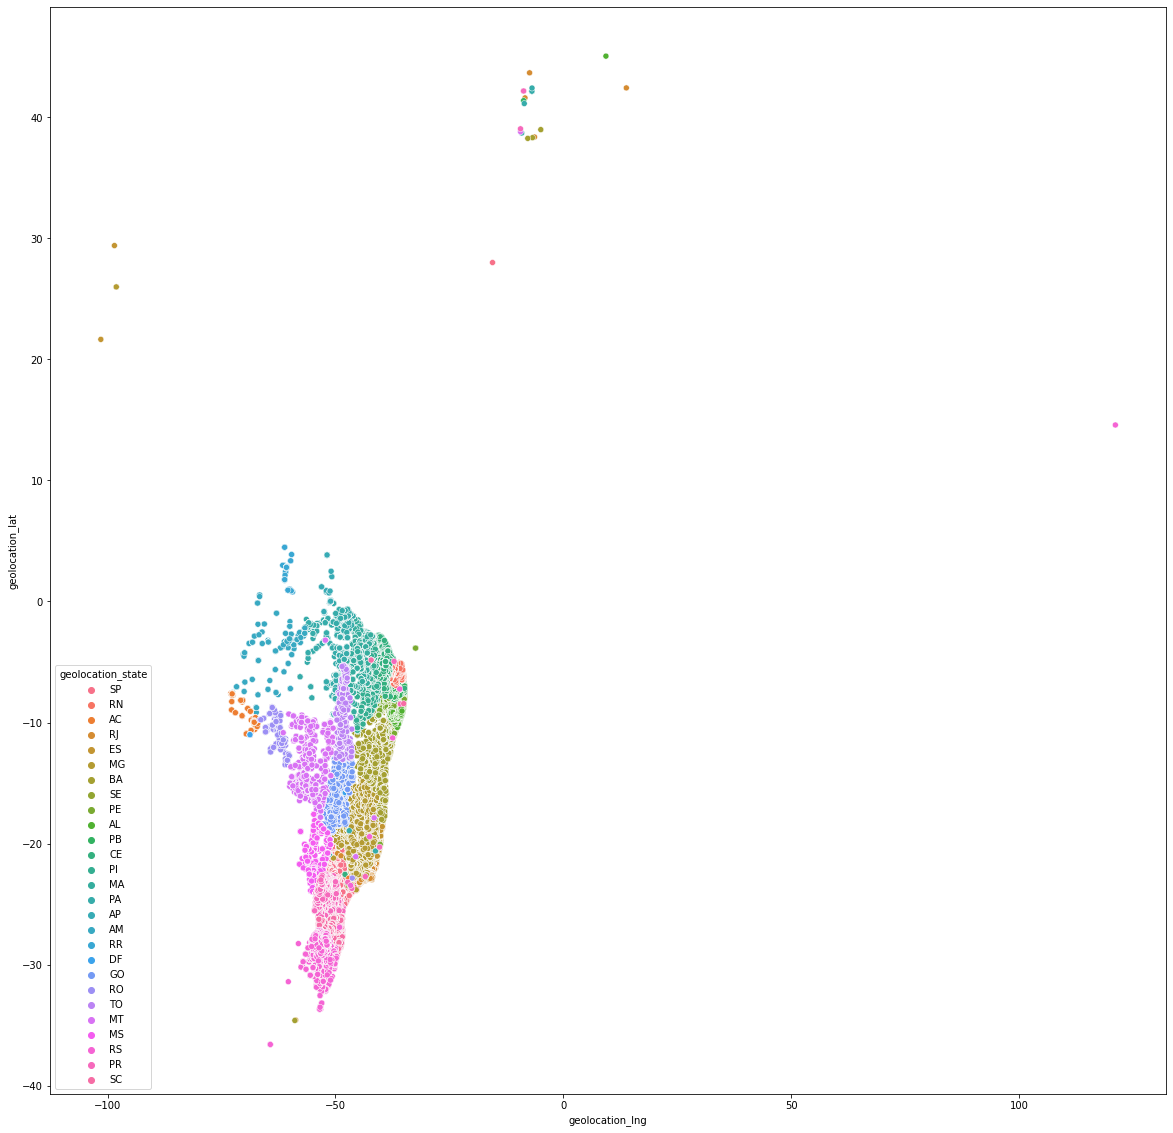

In [64]:
plt.figure(figsize = (20,20))
sns.scatterplot(data = df_geoloc, x = "geolocation_lng", y = "geolocation_lat", hue = "geolocation_state")
plt.show()

In [65]:
df_geoloc

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,duplicated
0,1037,-23.545621,-46.639292,sao paulo,SP,False
1,1046,-23.546081,-46.644820,sao paulo,SP,False
2,1046,-23.546129,-46.642951,sao paulo,SP,False
3,1041,-23.544392,-46.639499,sao paulo,SP,False
4,1035,-23.541578,-46.641607,sao paulo,SP,False
...,...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS,False
1000159,99900,-27.877125,-52.224882,getulio vargas,RS,True
1000160,99950,-28.071855,-52.014716,tapejara,RS,True
1000161,99980,-28.388932,-51.846871,david canabarro,RS,False


In [66]:
# Removing some outliers

# https://en.wikipedia.org/wiki/List_of_extreme_points_of_Brazil#Latitude_and_longitude
# https://www.rapidtables.com/convert/number/degrees-minutes-seconds-to-degrees.html

# Northernmost point: Monte Caburaí, Roraima (05°15′05″N 060°12′33″W)
# 05°15′05″N = 5.251389°
df_geoloc = df_geoloc[df_geoloc.geolocation_lat <= 5.27438888]

# Westernmost point: Serra do Divisor, Acre (07°32′39″S 073°59′04″W)
# 073°59′04″ = 73.98444°
df_geoloc = df_geoloc[df_geoloc.geolocation_lng >= -73.98444]

# Southernmost point: Barra do Chuí, Rio Grande do Sul (33°45′09″S 053°22′07″W)
# 33°45′09″S = -33.7525
df_geoloc = df_geoloc[df_geoloc.geolocation_lat >= -33.7525]

# Easternmost point: Ilha do Sul, Ilhas Martin Vaz, Espírito Santo (20°28′28″S 034°50′26″W)
# 034°50′26″W = 34.84056
df_geoloc = df_geoloc[df_geoloc.geolocation_lng <=  -34.84056]

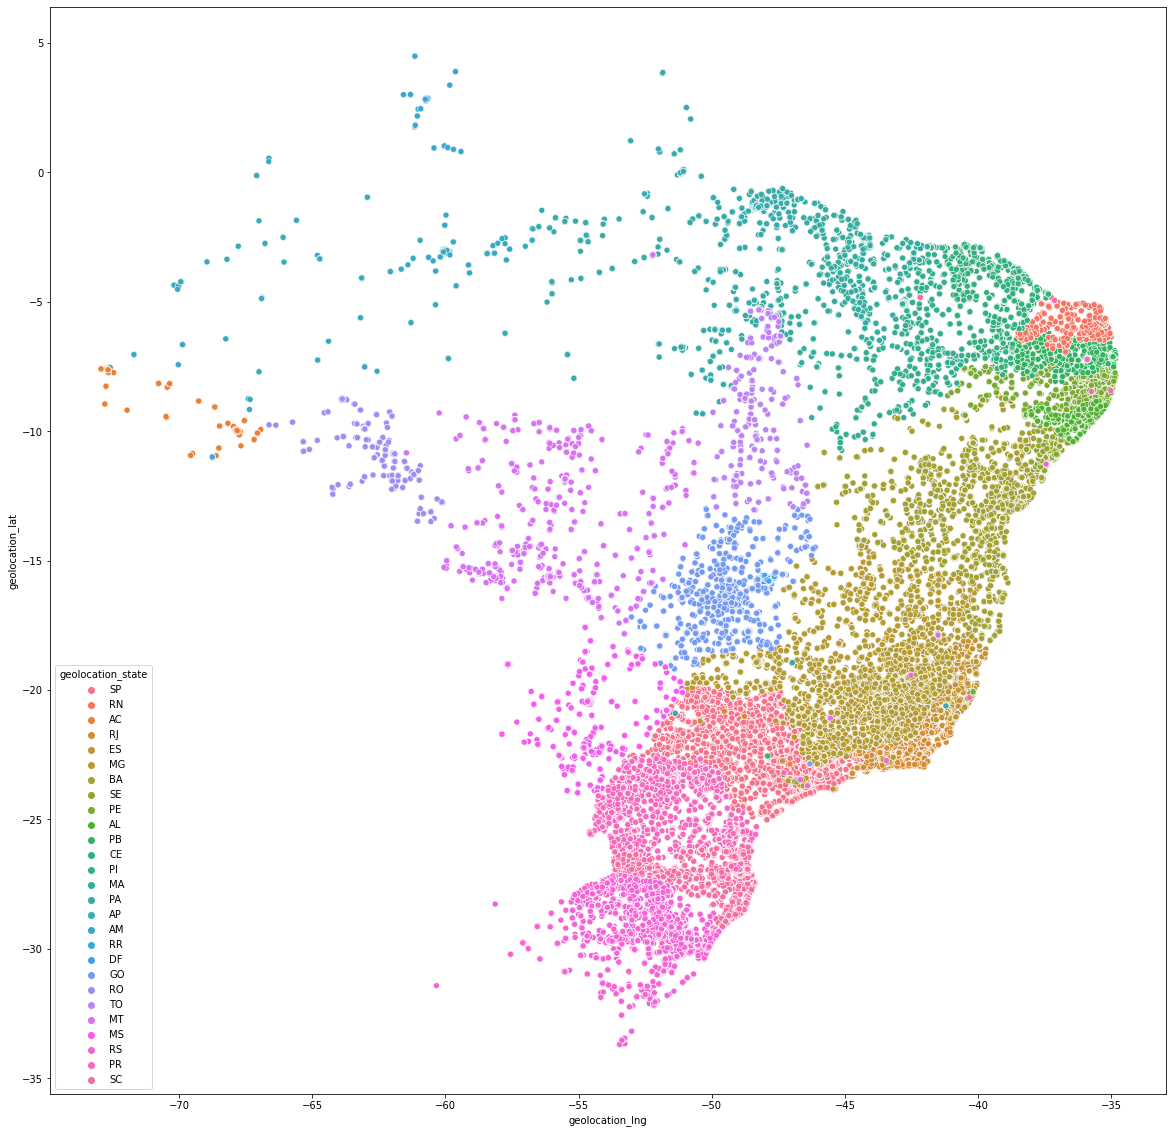

In [67]:
plt.figure(figsize = (20,20))
sns.scatterplot(data = df_geoloc, x = "geolocation_lng", y = "geolocation_lat", hue = "geolocation_state")
plt.show()

We understand at first that at geoloc there's 261831 duplicate data. let's try to eliminate the duplicate data and see how it changes

In [68]:
df_geoloc.drop_duplicates(inplace = True)

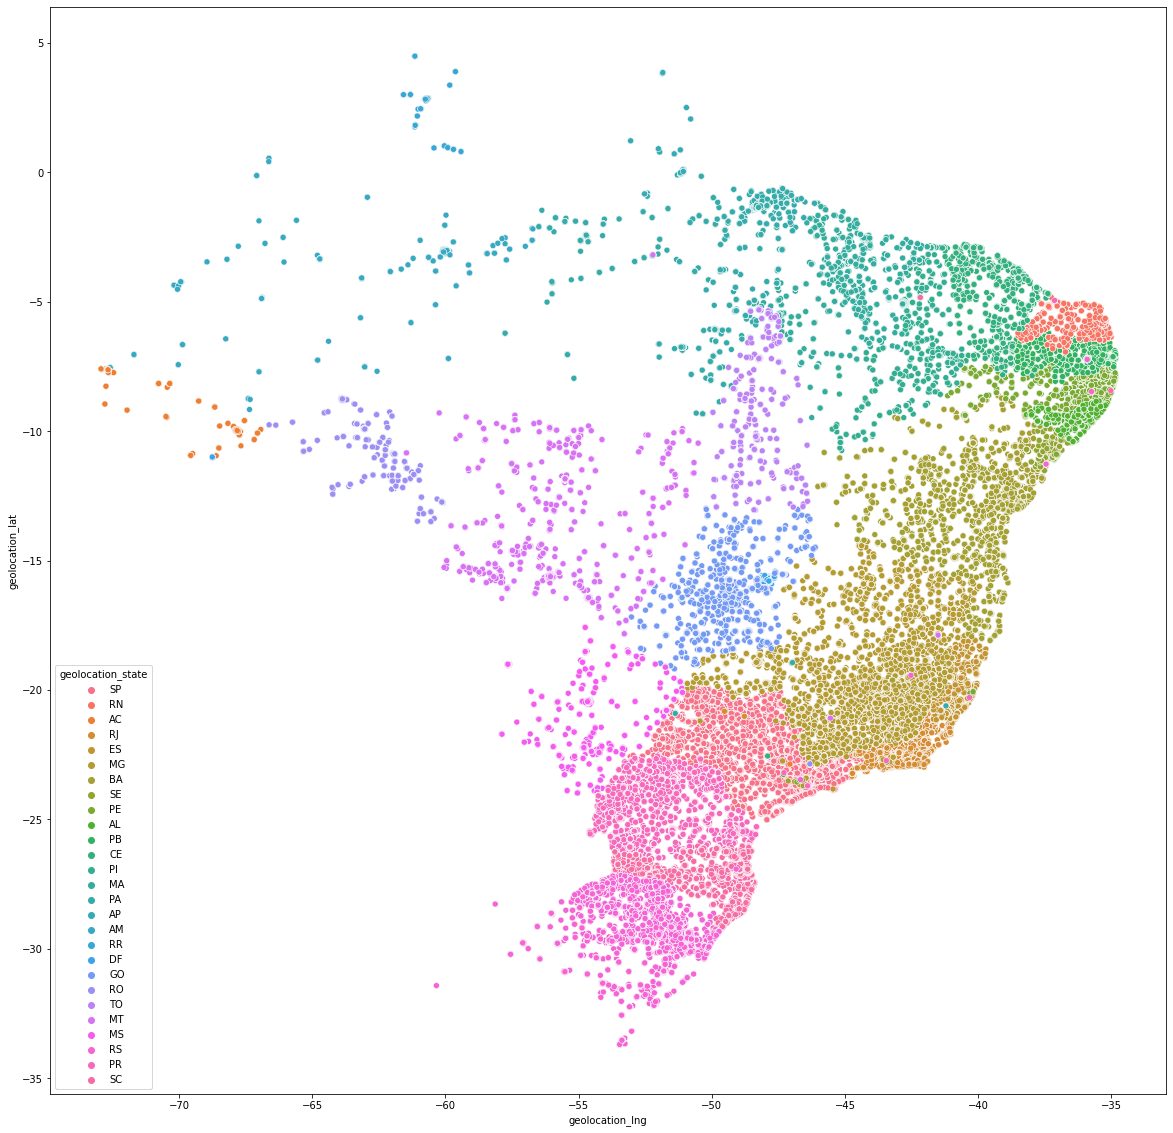

In [69]:
plt.figure(figsize = (20,20))
sns.scatterplot(data = df_geoloc, x = "geolocation_lng", y = "geolocation_lat", hue = "geolocation_state")
plt.show()

---

***DATAFRAME 1***

This dataframe contain no product. General overview of the e-commerce.
* total transaction
* orderstatus
* transaction by payment type

In [70]:
# Merging Process
df_TBL1 = pd.merge(df_orders, df_payments, how = "left", left_on = "order_id", right_on = "order_id")

# Check dataframshape
print("df_orders = ", df_orders.shape)
print("df_payments = ", df_payments.shape)
print("df_TB1 = ", df_TBL1.shape)

# Check dataframe output
df_TBL1.head()

df_orders =  (99441, 8)
df_payments =  (101686, 4)
df_TB1 =  (101687, 11)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_splits,payment_per_payment_type
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,voucher,2.0,20.59
2,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,boleto,1.0,141.46
3,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,credit_card,1.0,179.12
4,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,credit_card,1.0,72.20


In [71]:
df_TBL1["order_purchase_timestamp"] = pd.to_datetime(df_TBL1["order_purchase_timestamp"])
df_TBL1["order_approved_at"] = pd.to_datetime(df_TBL1["order_approved_at"])
df_TBL1["order_delivered_carrier_date"] = pd.to_datetime(df_TBL1["order_delivered_carrier_date"])
df_TBL1["order_delivered_customer_date"] = pd.to_datetime(df_TBL1["order_delivered_customer_date"])
df_TBL1["order_estimated_delivery_date"] = pd.to_datetime(df_TBL1["order_estimated_delivery_date"])

In [72]:
df_TBL1.dropna(inplace = True)

In [73]:
print("df_TB1 = ", df_TBL1.shape)
general_eda(df_TBL1)

df_TB1 =  (98642, 11)


,features,type,n_null,nullpct,n_unique,sampledata
0,order_id,object,0,0.0,96460,"[1e6f7a3666909b73be23bb1937571c27, 1972a123466d40a62224630f7d0de530]"
1,customer_id,object,0,0.0,96460,"[bf06c86a8b45ff125329d7fb1e3c2198, 9ad093e3c09e370f0f79dd573a9b2f34]"
2,order_status,object,0,0.0,2,"[canceled, delivered]"
3,order_purchase_timestamp,datetime64[ns],0,0.0,95938,"[2018-01-02T10:45:15.000000000, 2018-01-24T20:03:41.000000000]"
4,order_approved_at,datetime64[ns],0,0.0,88271,"[2018-05-11T10:17:48.000000000, 2018-06-08T15:31:38.000000000]"
5,order_delivered_carrier_date,datetime64[ns],0,0.0,80099,"[2017-10-05T19:09:00.000000000, 2017-02-20T08:15:17.000000000]"
6,order_delivered_customer_date,datetime64[ns],0,0.0,95648,"[2017-10-13T17:56:00.000000000, 2018-02-14T21:09:19.000000000]"
7,order_estimated_delivery_date,datetime64[ns],0,0.0,444,"[2017-07-10T00:00:00.000000000, 2017-11-03T00:00:00.000000000]"
8,payment_type,object,0,0.0,4,"[boleto, voucher]"
9,payment_splits,float64,0,0.0,18,"[15.0, 21.0]"


In [74]:
df_TBL1.to_excel("Tableau_1_Brazil_E_commerce.xlsx")

---

***DATAFRAME 2***

This dataframe contain no product. General overview of the e-commerce
* Reviews

In [75]:
# Merging Process
df_TBL2 = pd.merge(df_orders, df_reviews, how = "left", left_on = "order_id", right_on = "order_id")

# Check dataframshape
print("df_orders = ", df_orders.shape)
print("df_reviews = ", df_reviews.shape)
print("df_TB2 = ", df_TBL2.shape)

# Check dataframe output
df_TBL2.head()

df_orders =  (99441, 8)
df_reviews =  (99224, 7)
df_TB2 =  (99992, 14)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio bem amassada e danificada, o que ficará chato, pois se trata de um presente.",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e estava descrito no site e chegou bem antes da data prevista.,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,e50934924e227544ba8246aeb3770dd4,5.0,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51


We're not gonna use em all. let's filter them it right away

In [76]:
df_TBL2 = df_TBL2[["review_id", "order_id", "review_score"]]

In [77]:
general_eda(df_TBL2)

,features,type,n_null,nullpct,n_unique,sampledata
0,review_id,object,768,0.77,98410,"[34a4ed16d292cc88440047ee8ba1bac7, 31a0ede9ecca87acc4f020ef361bbb51]"
1,order_id,object,0,0.00,99441,"[13b2cd56f806ffc7938f53c374085817, e83fecff545147241edc9399a93c8e53]"
2,review_score,float64,768,0.77,5,"[3.0, 5.0]"


After filtering. we see that we still have several missing values. let's clean it 

In [78]:
df_TBL2.dropna(inplace = True)

In [79]:
df_TBL2.shape

(99224, 3)

In [80]:
df_TBL2.to_excel("Tableau_2_Brazil_E_commerce.xlsx")

---

***DATAFRAME 3***

This dataframe contain product & seller
* Reviews

In [81]:
df_dummy_1 = pd.merge(df_order_items, df_products, how = "left", left_on = "product_id", right_on = "product_id")

# Check dataframshape
print("df_order_items = ", df_order_items.shape)
print("df_products = ", df_products.shape)
print("df_dummy_1 = ", df_dummy_1.shape)

# Check dataframe output
df_dummy_1.head()

df_order_items =  (102425, 8)
df_products =  (32951, 6)
df_dummy_1 =  (102425, 13)


,order_id,product_id,seller_id,shipping_limit_date,n_items_purchased,product_price_m,ship_cost_m,product_price_&_ship_cost,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,1,58.90,13.29,72.19,cool_stuff,58.0,598.0,4.0,650.0
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,1,239.90,19.93,259.83,pet_shop,56.0,239.0,2.0,30000.0
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,1,199.00,17.87,216.87,moveis_decoracao,59.0,695.0,2.0,3050.0
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,1,12.99,12.79,25.78,perfumaria,42.0,480.0,1.0,200.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,1,199.90,18.14,218.04,ferramentas_jardim,59.0,409.0,1.0,3750.0


In [82]:
df_TBL3 = pd.merge(df_orders, df_dummy_1, how = "left", left_on = "order_id", right_on = "order_id")

# Check dataframshape
print("df_orders = ", df_orders.shape)
print("df_dummy_1 = ", df_dummy_1.shape)
print("df_TBL3 = ", df_TBL3.shape)

# Check dataframe output
df_TBL3.head()

df_orders =  (99441, 8)
df_dummy_1 =  (102425, 13)
df_TBL3 =  (103200, 20)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,shipping_limit_date,n_items_purchased,product_price_m,ship_cost_m,product_price_&_ship_cost,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,1.0,29.99,8.72,38.71,utilidades_domesticas,40.0,268.0,4.0,500.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,1.0,118.70,22.76,141.46,perfumaria,29.0,178.0,1.0,400.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,1.0,159.90,19.22,179.12,automotivo,46.0,232.0,1.0,420.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,1.0,45.00,27.20,72.20,pet_shop,59.0,468.0,3.0,450.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,1.0,19.90,8.72,28.62,papelaria,38.0,316.0,4.0,250.0


In [83]:
df_TBL3 = pd.merge(df_TBL3, df_sellers, how = "left", left_on = "seller_id", right_on = "seller_id")
df_TBL3 = pd.merge(df_TBL3, df_customers, how = "left", left_on = "customer_id", right_on = "customer_id")

print("df_TBL3 = ", df_TBL3.shape)

# Check dataframe output
df_TBL3.head()

df_TBL3 =  (103200, 26)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,shipping_limit_date,n_items_purchased,product_price_m,ship_cost_m,product_price_&_ship_cost,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,1.0,29.99,8.72,38.71,utilidades_domesticas,40.0,268.0,4.0,500.0,9350.0,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,1.0,118.70,22.76,141.46,perfumaria,29.0,178.0,1.0,400.0,31570.0,belo horizonte,SP,af07308b275d755c9edb36a90c618231,47813,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,1.0,159.90,19.22,179.12,automotivo,46.0,232.0,1.0,420.0,14840.0,guariba,SP,3a653a41f6f9fc3d2a113cf8398680e8,75265,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,1.0,45.00,27.20,72.20,pet_shop,59.0,468.0,3.0,450.0,31842.0,belo horizonte,MG,7c142cf63193a1473d2e66489a9ae977,59296,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,1.0,19.90,8.72,28.62,papelaria,38.0,316.0,4.0,250.0,8752.0,mogi das cruzes,SP,72632f0f9dd73dfee390c9b22eb56dd6,9195,SP


We're not gonna use em all. let's filter them it right away

In [84]:
df_TBL3 = df_TBL3[["order_id", "customer_id", "seller_id", 
                   "product_category_name", "n_items_purchased", "product_price_m", "ship_cost_m", "product_price_&_ship_cost",
                   "seller_state", "customer_state"]]

In [85]:
df_TBL3.dropna(inplace = True)

In [86]:
general_eda(df_TBL3)

,features,type,n_null,nullpct,n_unique,sampledata
0,order_id,object,0,0.0,97277,"[59ff850287c170ca0c5844a659a456a0, 4ade81c98608cbcec03c4c345efaed72]"
1,customer_id,object,0,0.0,97277,"[42d4a2e8a460728da550948367a9f2d9, 97d63feda8926a333e24d685b9be138f]"
2,seller_id,object,0,0.0,3035,"[9b00cad94ef3078faf6fba2e792c158f, a9ae440659f48b7849df83e82734150b]"
3,product_category_name,object,0,0.0,73,"[eletrodomesticos_2, la_cuisine]"
4,n_items_purchased,float64,0,0.0,16,"[14.0, 3.0]"
5,product_price_m,float64,0,0.0,6906,"[19.47, 99.7]"
6,ship_cost_m,float64,0,0.0,7935,"[52.06, 160.82999999999998]"
7,product_price_&_ship_cost,float64,0,0.0,30961,"[240.74, 319.13]"
8,seller_state,object,0,0.0,23,"[MS, MG]"
9,customer_state,object,0,0.0,27,"[GO, PR]"


In [87]:
df_TBL3.to_excel("Tableau_3_Brazil_E_commerce.xlsx")